In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as se

%matplotlib inline

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

import warnings 
warnings.filterwarnings('ignore')

# Data load and Data understanding

## load the csv file
## Analyse the columns and rows


In [5]:
df = pd.read_csv("train.csv")

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.shape

(1460, 81)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:

s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

s = (df.dtypes == 'int64')
num_cols2 = list(s[s].index)
print("Integer variables:")
print(num_cols2)

s = (df.dtypes == 'float')
num_cols = list(s[s].index)
print("Real variables:")
print(num_cols)
print(len(object_cols)+len(num_cols)+len(num_cols2))

Categorical variables:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Integer variables:
['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'En

In [14]:
print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


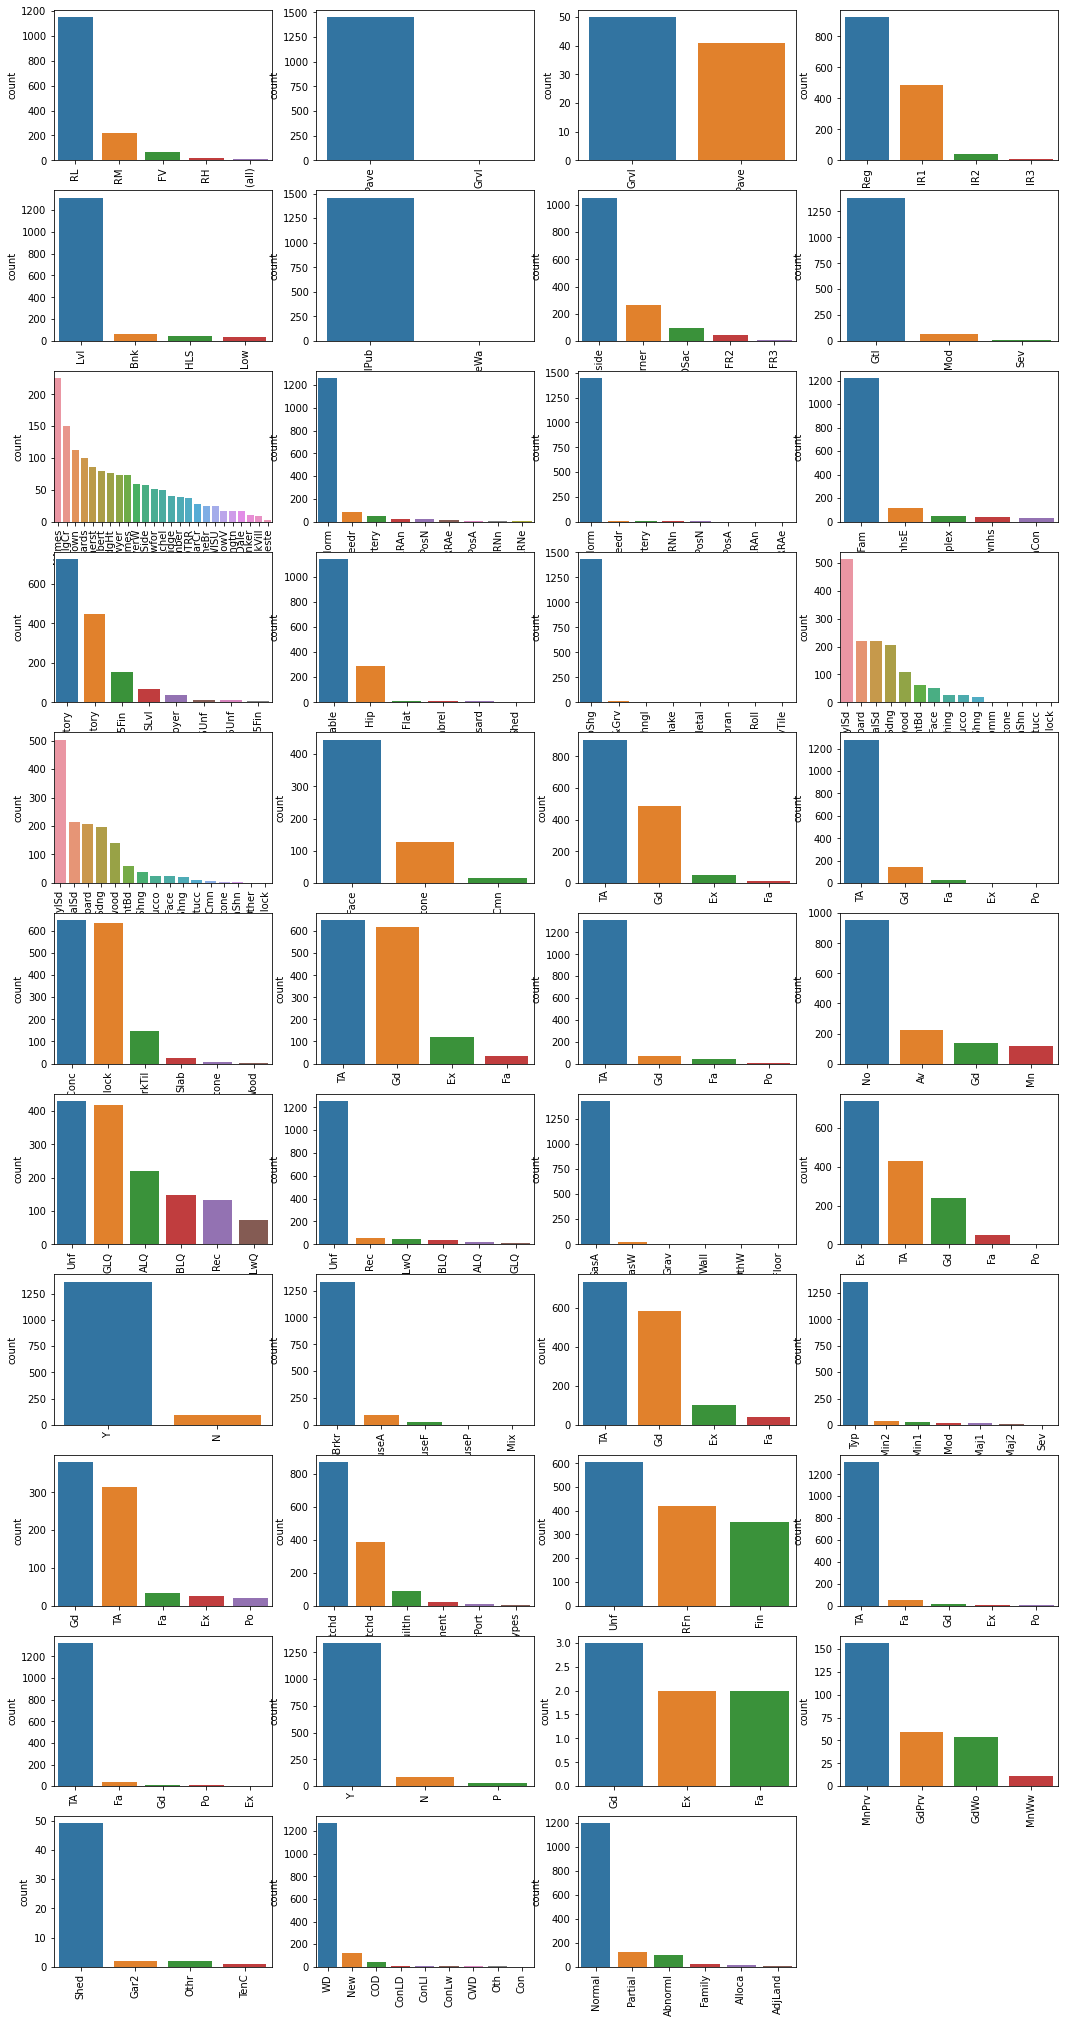

In [17]:
plt.figure(figsize=(18,36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
for col in object_cols:
  y = df[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  se.barplot(x=list(y.index), y=y)
  index +=1
     

# EDA

### fill the null value with None for column having datatype as object

In [18]:
df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType       872
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [19]:
for col_na in ('Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
               'BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish',
               'GarageQual','GarageCond','PoolQC','Fence','MiscFeature'): 
                df[col_na]= df[col_na].fillna('None')

In [20]:
df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [21]:
df_2 = df.copy()

In [22]:
print(df_2.isnull().sum().sum())

348


In [24]:
#Caluclate property age at the time of selling based on construction / remodel date

def calcNewOld(row):
    if (row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
df_2['oldornew'] = df_2.apply(calcNewOld, axis=1)

def calcPropertyAge(row):
    if (row['oldornew'] == 0):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
    
df_2['PropertyAge'] = df_2.apply(calcPropertyAge, axis=1)
df_2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,oldornew,PropertyAge
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,None,None,0,2,2008,WD,Normal,208500,0,5
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,None,None,0,5,2007,WD,Normal,181500,0,31
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,None,None,0,9,2008,WD,Normal,223500,1,6
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,None,None,0,2,2006,WD,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,None,None,0,12,2008,WD,Normal,250000,0,8


In [25]:
#Garage Age: >20 years is old else new

df_2['GarageYrBlt'] = df_2['GarageYrBlt'].fillna(0)
df_2['GarageYrBlt'] = df_2['GarageYrBlt'].astype(int)

# new or old garage

def GarageAge(row):
    if row == 0: #
        return 0
    elif row >=1900 and row < 2002:
        return 0
    else:
        return 1

df_2['GarageAge'] = df_2['GarageYrBlt'].apply(GarageAge)

df_2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,oldornew,PropertyAge,GarageAge
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,None,0,2,2008,WD,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,None,0,5,2007,WD,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,None,0,9,2008,WD,Normal,223500,1,6,0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,None,0,2,2006,WD,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,None,0,12,2008,WD,Normal,250000,0,8,0


In [26]:
#Drop redundant columns
df_2.drop(['YearBuilt', 'YearRemodAdd', 'YrSold','GarageYrBlt'], axis = 1, inplace = True)

In [27]:
df_2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,oldornew,PropertyAge,GarageAge
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,None,None,0,2,WD,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,None,None,0,5,WD,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,None,None,0,9,WD,Normal,223500,1,6,0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,None,None,0,2,WD,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,None,None,0,12,WD,Normal,250000,0,8,0


In [28]:
df_2.duplicated().value_counts()

False    1460
Name: count, dtype: int64

### Find the columns with more than 90% duplicate columns

In [38]:
df_2['Functional'].value_counts()

Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64

In [56]:
def dupcat():
    dup_column = []
    cat_feature = df_2.select_dtypes(include = ['object'])

    for cl in (cat_feature):
        if(df_2[cl].value_counts().max() >= 1314):
            dup_column.append(cl)
    return dup_column

drop_col = dupcat()
print(drop_col)

['Street', 'Alley', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageCond', 'PavedDrive', 'PoolQC', 'MiscFeature']


In [57]:
# There are 14 columns with 90% duplicates
print(len(drop_col))

14


In [58]:
df_2.drop(drop_col, axis = 1, inplace=True)
df_2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,PoolArea,Fence,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,oldornew,PropertyAge,GarageAge
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,...,0,None,0,2,WD,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,...,0,None,0,5,WD,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,...,0,None,0,9,WD,Normal,223500,1,6,0
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,...,0,None,0,2,WD,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,...,0,None,0,12,WD,Normal,250000,0,8,0


In [47]:
df_2['SaleType'].value_counts()

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

In [59]:
def dupcat():
    dup_column = []
    cat_feature = df_2.select_dtypes(include = ['object'])

    for cl in (cat_feature):
        if(df_2[cl].value_counts().max() >= 1241):
            dup_column.append(cl)
    return dup_column

drop_col = dupcat()
print(drop_col)

['LandContour', 'Condition1', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'GarageQual', 'SaleType']


In [60]:
# There are 7 columns with 85% duplicates
print(len(drop_col))

7


In [61]:
df_2.drop(drop_col, axis = 1, inplace=True)
df_2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleCondition,SalePrice,oldornew,PropertyAge,GarageAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,Normal,223500,1,6,0
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,Normal,250000,0,8,0


In [55]:
df_2['MiscVal'].value_counts()

MiscVal
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: count, dtype: int64

In [62]:
def NumericNullCount():
    RepCol = []
    numerical_col = df_2.select_dtypes(include =['int64', 'float'])
    for cl in (numerical_col):
        if (df_2[cl].value_counts().max() >= 1241):
            RepCol.append(cl)
    return RepCol

drop_col = NumericNullCount()

print(drop_col)

['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [63]:
df_2.drop(drop_col, axis =1, inplace = True)
df_2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleCondition,SalePrice,oldornew,PropertyAge,GarageAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,548,0,61,None,2,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,460,298,0,None,5,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,608,0,42,None,9,Normal,223500,1,6,0
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,642,0,35,None,2,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,836,192,84,None,12,Normal,250000,0,8,0


In [64]:
df_2.select_dtypes(include=['int64','float']).isnull().sum()[df_2.select_dtypes(include=['int64','float']).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
dtype: int64

In [65]:
df_2['LotFrontage'] = df_2['LotFrontage'].replace(np.nan, df_2['LotFrontage'].median())
df_2['MasVnrArea'] = df_2['MasVnrArea'].replace(np.nan, df_2['MasVnrArea'].median())

In [66]:
df_2.describe(percentiles = [.25,.5,.75,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,oldornew,PropertyAge,GarageAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,0.613014,1.767123,472.980137,94.244521,46.660274,6.321918,180921.195890,0.476712,22.950000,0.243151
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,0.644666,0.747315,213.804841,125.338794,66.256028,2.703626,79442.502883,0.499629,20.640653,0.429132
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,1.000000,334.500000,0.000000,0.000000,5.000000,129975.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,1.000000,2.000000,480.000000,0.000000,25.000000,6.000000,163000.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,1.000000,2.000000,576.000000,168.000000,68.000000,8.000000,214000.000000,1.000000,41.000000,0.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,...,2.000000,3.000000,1002.790000,505.460000,285.820000,12.000000,442567.010000,1.000000,60.000000,1.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,2336.000000,6110.000000,...,3.000000,4.000000,1418.000000,857.000000,547.000000,12.000000,755000.000000,1.000000,60.000000,1.000000


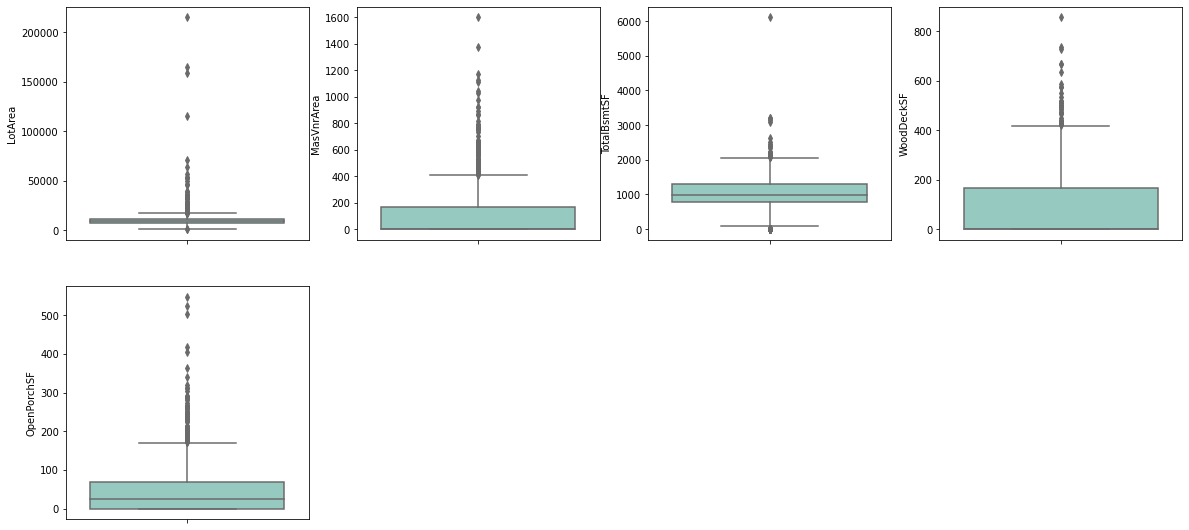

In [67]:
plt.figure(figsize = (20,30))
plt.subplot(6,4,1)
se.boxplot(y= 'LotArea', palette = 'Set3', data = df_2)
plt.subplot(6,4,2)
se.boxplot(y= 'MasVnrArea', palette = 'Set3', data = df_2)
plt.subplot(6,4,3)
se.boxplot(y= 'TotalBsmtSF', palette = 'Set3', data = df_2)
plt.subplot(6,4,4)
se.boxplot(y= 'WoodDeckSF', palette = 'Set3', data = df_2)
plt.subplot(6,4,5)
se.boxplot(y= 'OpenPorchSF', palette = 'Set3', data = df_2)

plt.show()

In [68]:
##remove outlier

outLotArea = df_2['LotArea'].quantile(0.99)
df_2 = df_2[df_2['LotArea'] < outLotArea]


outMasVnrArea = df_2['MasVnrArea'].quantile(0.99)
df_2 = df_2[df_2['MasVnrArea'] < outMasVnrArea]

outTotalBsmtSF = df_2['TotalBsmtSF'].quantile(0.99)
df_2 = df_2[df_2['TotalBsmtSF'] < outTotalBsmtSF]


outWoodDeckSF = df_2['WoodDeckSF'].quantile(0.99)
df_2 = df_2[df_2['WoodDeckSF'] < outWoodDeckSF]

outOpenPorchSF = df_2['OpenPorchSF'].quantile(0.99)
df_2 = df_2[df_2['OpenPorchSF'] < outOpenPorchSF]

ret_data = round(100*(len(df_2)/1460),2)

print(ret_data)

94.93


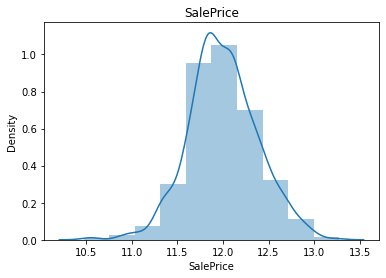

In [69]:
df_2['SalePrice'] = np.log1p(df_2['SalePrice'])

# Ploting sales price as target variable

plt.title('SalePrice')
se.distplot(df_2['SalePrice'], bins =10)
plt.show()

<Figure size 864x432 with 0 Axes>

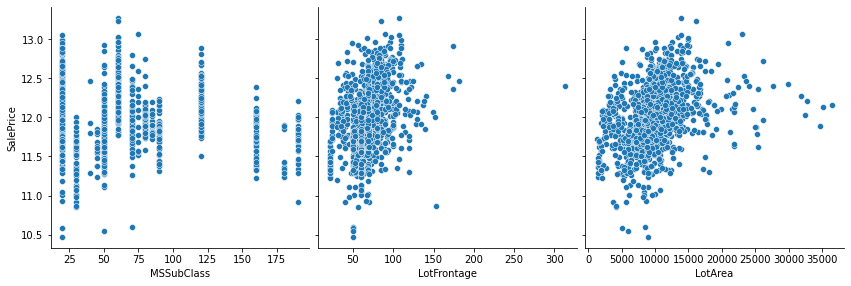

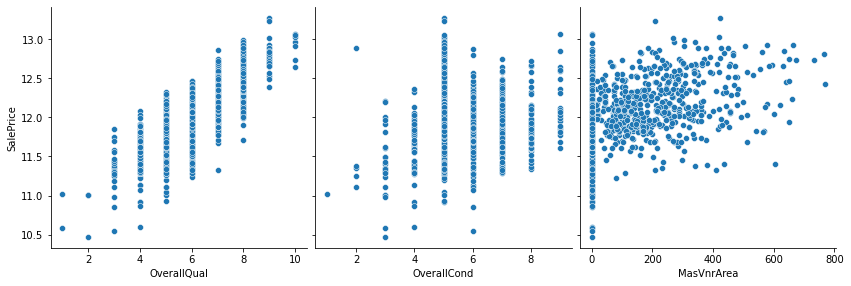

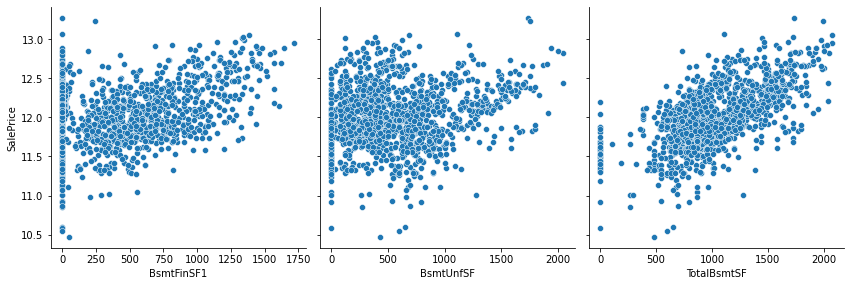

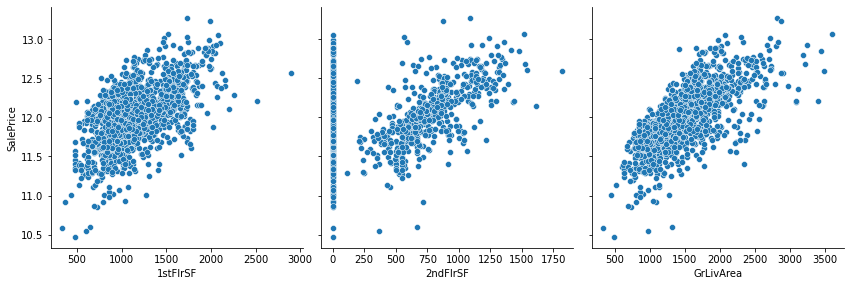

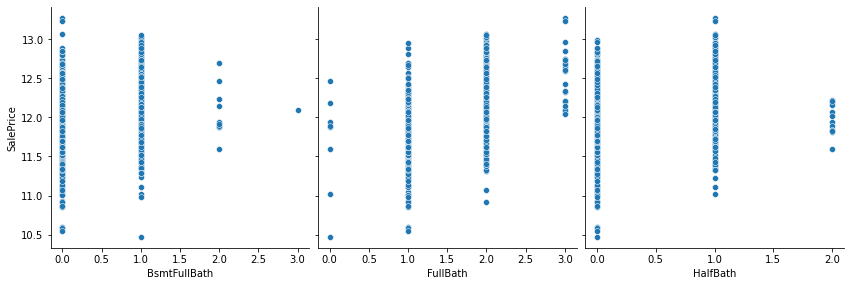

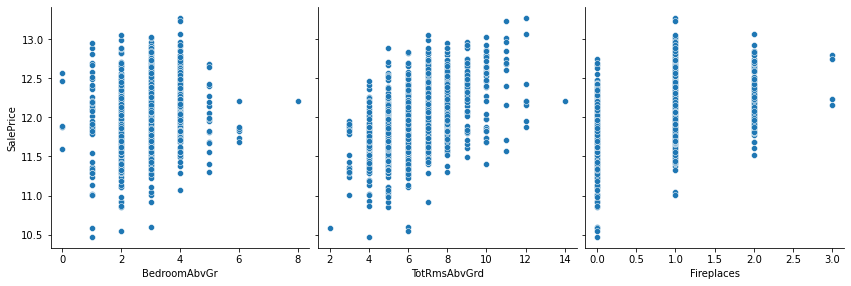

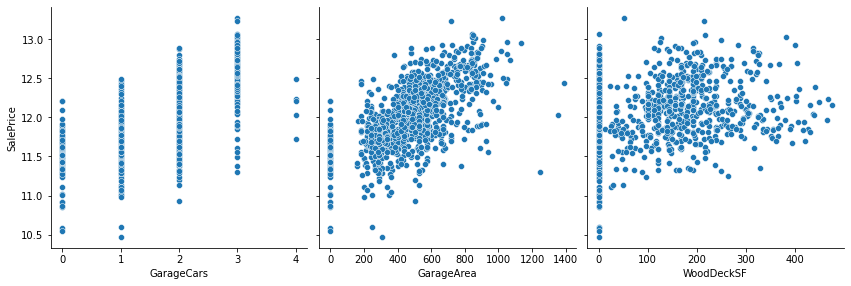

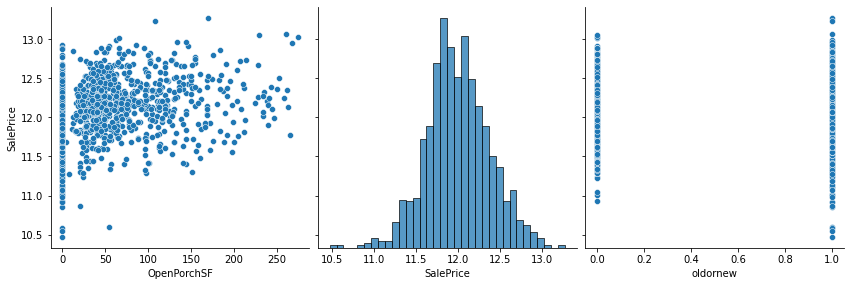

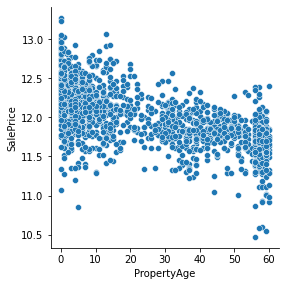

In [72]:
plt.figure(figsize =(12,6))
se.pairplot(df_2, x_vars = ['MSSubClass', 'LotFrontage','LotArea'], y_vars = 'SalePrice', height=4, aspect =1, kind= 'scatter')
se.pairplot(df_2, x_vars = ['OverallQual', 'OverallCond','MasVnrArea'], y_vars = 'SalePrice', height=4, aspect =1, kind= 'scatter')
se.pairplot(df_2, x_vars = ['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF'], y_vars = 'SalePrice', height=4, aspect =1, kind= 'scatter')
se.pairplot(df_2, x_vars = ['1stFlrSF','2ndFlrSF','GrLivArea'], y_vars = 'SalePrice', height=4, aspect =1, kind= 'scatter')
se.pairplot(df_2, x_vars = ['BsmtFullBath','FullBath','HalfBath'],y_vars = 'SalePrice', height=4, aspect =1, kind= 'scatter')
se.pairplot(df_2, x_vars = ['BedroomAbvGr','TotRmsAbvGrd','Fireplaces'],y_vars = 'SalePrice', height=4, aspect =1, kind= 'scatter')
se.pairplot(df_2, x_vars = ['GarageCars','GarageArea','WoodDeckSF'],y_vars = 'SalePrice', height=4, aspect =1, kind= 'scatter')
se.pairplot(df_2, x_vars = ['OpenPorchSF','SalePrice','oldornew'],y_vars = 'SalePrice', height=4, aspect =1, kind= 'scatter')
se.pairplot(df_2, x_vars = ['PropertyAge'],y_vars = 'SalePrice', height=4, aspect =1, kind= 'scatter')

In [73]:
s = (df_2.dtypes != 'object')
numerical_cols = list(s[s].index)
print("Numerical variables:")
print(numerical_cols)


Numerical variables:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'SalePrice', 'oldornew', 'PropertyAge', 'GarageAge']


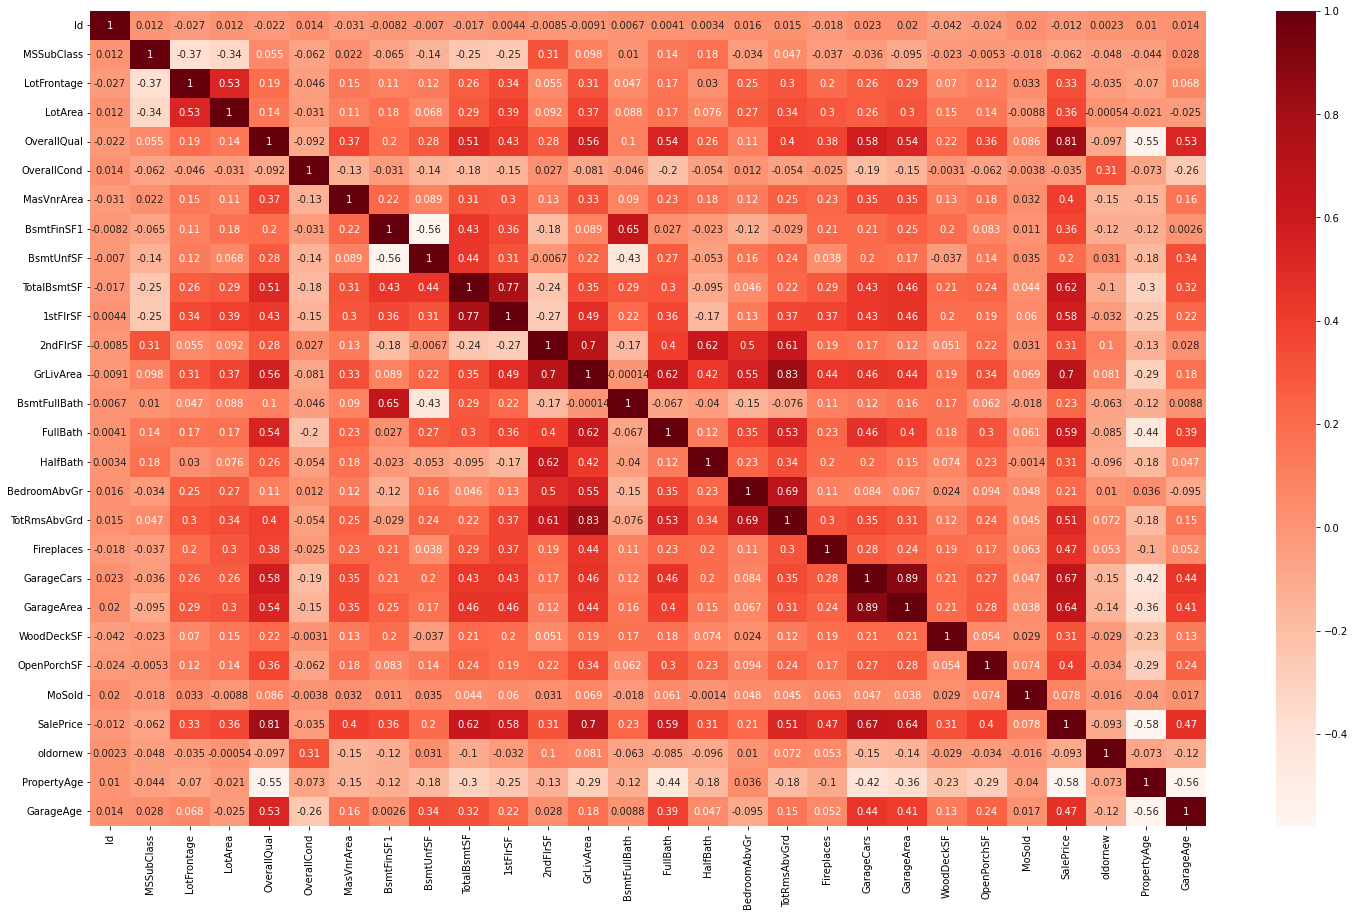

In [74]:
plt.figure(figsize = (25,15))
se.heatmap(df_2[numerical_cols].corr(), annot = True, cmap = "Reds")
plt.show()

### Observations
TotRmsAbvGrd and GrLivArea show 83% correlation
GarageArea and GarageCars show 89% correlation

In [75]:
df_2.drop(['TotRmsAbvGrd','GarageArea'], axis = 1, inplace = True)
df_2.shape

(1386, 48)

In [79]:
LotShapelist  = {'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3':0}
ExterQuallist = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po':1, 'None': 0}
BsmtQuallist = {'Ex':5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po':1, 'None': 0}
HeatingQClist = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}
KitchenQuallist = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}
FireplaceQulist = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po':1, 'None': 0}
BsmtExposurelist = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0}
BsmtFinType1list = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0}
GarageFinishlist = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0}
BldgTypelist = {'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2,'1Fam': 1, 'None': 0}                                                    
HouseStylelist = {'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4,'1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0}
Fencelist = {'GdPrv':4, 'GdWo': 3, 'MnPrv': 2,'MnWw':1,'None':0 }
LotConfiglist = {'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2,'FR3': 1, 'None': 0}
MasVnrTypelist = {'BrkCmn': 1, 'BrkFace': 1, 'Cblock': 1, 'Stone': 1,'None': 0}
SaleConditionlist = {'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0,'Alloca': 0, 'AdjLand': 0, 'None': 0}

In [80]:
df_2['New_LotShape'] = df_2['LotShape'].map(LotShapelist)
df_2['New_ExterQual'] = df_2['ExterQual'].map(ExterQuallist)
df_2['New_BsmtQual'] = df_2['BsmtQual'].map(BsmtQuallist)
df_2['New_HeatingQC'] = df_2['HeatingQC'].map(HeatingQClist)
df_2['New_KitchenQual'] = df_2['KitchenQual'].map(KitchenQuallist)
df_2['New_FireplaceQu'] = df_2['FireplaceQu'].map(FireplaceQulist)
df_2['New_BsmtExposure'] = df_2['BsmtExposure'].map(BsmtExposurelist)
df_2['New_BsmtFinType1'] = df_2['BsmtFinType1'].map(BsmtFinType1list)
df_2['New_GarageFinish'] = df_2['GarageFinish'].map(GarageFinishlist)
df_2['New_BldgType'] = df_2['BldgType'].map(BldgTypelist)
df_2['New_HouseStyle'] = df_2['HouseStyle'].map(HouseStylelist)
df_2['New_Fence'] = df_2['Fence'].map(Fencelist)
df_2['New_LotConfig'] = df_2['LotConfig'].map(LotConfiglist)
df_2['New_MasVnrType'] = df_2['MasVnrType'].map(MasVnrTypelist)
df_2['New_SaleCondition'] = df_2['SaleCondition'].map(SaleConditionlist)

In [81]:
df_2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,New_FireplaceQu,New_BsmtExposure,New_BsmtFinType1,New_GarageFinish,New_BldgType,New_HouseStyle,New_Fence,New_LotConfig,New_MasVnrType,New_SaleCondition
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,1,6,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,3,4,5,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,3,2,6,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,4,1,5,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,3,6,2,1,4,0,2,1,1


In [82]:
df_2 = df_2.drop(['Id', 'LotShape','ExterQual','BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 'LotConfig',
                                 'MasVnrType', 'SaleCondition'], axis = 1)

In [83]:
#Create Dummy variables

# MSZoning
dm_MSZoning = pd.get_dummies(df_2['MSZoning'], prefix = 'MSZoning', drop_first = True, dtype = 'uint8')
df_2 = pd.concat([df_2, dm_MSZoning], axis = 1)

# Neighborhood
dm_Neighborhood = pd.get_dummies(df_2['Neighborhood'], prefix = 'Neighborhood', drop_first = True, dtype = 'uint8')
df_2 = pd.concat([df_2, dm_Neighborhood], axis = 1)

# RoofStyle
dm_RoofStyle = pd.get_dummies(df_2['RoofStyle'], prefix = 'RoofStyle', drop_first = True, dtype = 'uint8')
df_2 = pd.concat([df_2, dm_RoofStyle], axis = 1)

# Exterior1st
dm_Exterior1st = pd.get_dummies(df_2['Exterior1st'], prefix = 'Exterior1st', drop_first = True, dtype = 'uint8')
df_2 = pd.concat([df_2, dm_Exterior1st], axis = 1)

# Exterior2nd
dm_Exterior2nd = pd.get_dummies(df_2['Exterior2nd'], prefix = 'Exterior2nd', drop_first = True, dtype = 'uint8')
df_2 = pd.concat([df_2, dm_Exterior2nd], axis = 1)

# Foundation
dm_Foundation = pd.get_dummies(df_2['Foundation'], prefix = 'Foundation', drop_first = True, dtype = 'uint8')
df_2 = pd.concat([df_2, dm_Foundation], axis = 1)

# GarageType
dm_GarageType = pd.get_dummies(df_2['GarageType'], prefix = 'GarageType', drop_first = True, dtype = 'uint8')
df_2 = pd.concat([df_2, dm_GarageType], axis = 1)

In [84]:
df_2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


In [85]:
df_2 = df_2.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 
                                  'Exterior2nd', 'Foundation', 'GarageType'], axis=1)

In [144]:
df_2.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


### Regression Analysis

In [121]:
# Define Dependent and Independent Variables
y = df_2['SalePrice']
X = df_2.drop(['SalePrice'], axis=1)

In [122]:
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [123]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [100]:
col_num = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'PropertyAge']

In [101]:
X_train[col_num]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,MoSold,PropertyAge
953,60,69.0,11075,5,4,232.0,562,29,784,1168,...,0,2,1,4,1,2,305,189,9,39
1180,60,69.0,11170,7,5,0.0,1216,0,1216,1298,...,0,2,1,4,0,2,0,0,4,15
567,20,70.0,10171,7,5,168.0,2,1515,1517,1535,...,0,2,0,3,0,2,0,0,3,6
1041,60,69.0,9130,6,8,252.0,400,336,800,800,...,0,1,1,4,0,2,0,40,7,8
518,60,69.0,9531,6,5,0.0,706,88,794,882,...,1,2,1,3,0,2,0,36,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,20,36.0,15523,5,6,0.0,460,404,864,864,...,1,1,0,3,1,1,0,0,8,37
54,80,60.0,7134,5,5,0.0,384,0,384,1360,...,0,1,0,3,1,2,0,50,2,52
368,20,78.0,7800,5,6,200.0,540,728,1268,1268,...,0,1,0,2,1,1,0,98,3,56
83,20,80.0,8892,5,5,66.0,0,1065,1065,1065,...,0,1,1,3,0,2,74,0,7,47


In [104]:
X_train[col_num] = scaler.fit_transform(X_train[col_num])
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
953,0.235294,0.164384,0.277699,0.444444,0.375,0.302872,0.341434,0.014486,0.377649,0.325273,...,0,0,0,0,1,0,0,0,0,0
1180,0.235294,0.164384,0.280398,0.666667,0.500,0.000000,0.738761,0.000000,0.585742,0.375975,...,0,0,0,1,1,0,0,0,0,0
567,0.000000,0.167808,0.252017,0.666667,0.500,0.219321,0.001215,0.756743,0.730732,0.468409,...,1,0,0,0,1,0,0,0,0,0
1041,0.235294,0.164384,0.222443,0.555556,0.875,0.328982,0.243013,0.167832,0.385356,0.181747,...,0,0,0,0,1,0,0,0,0,0
518,0.235294,0.164384,0.233835,0.555556,0.500,0.000000,0.428919,0.043956,0.382466,0.213729,...,1,0,0,0,1,0,0,0,0,0


In [125]:
#Data Scaling

# importing scale library
from sklearn.preprocessing import scale

cols = X_train.columns

X_train = pd.DataFrame(scale(X_train))
X_train.columns = cols
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=112)

In [126]:
#Model Cretion
lm = LinearRegression()
lm.fit(X_train, y_train)

# Executing RFE

rfe = RFE(estimator=lm,n_features_to_select=50,step=1)
rfe = rfe.fit(X_train, y_train)

col = X_train.columns[rfe.support_]

# Creating dataframe with slected 50 features

df_model = pd.DataFrame(list(zip(X_train.columns,rfe.support_, rfe.ranking_)), columns =['Feature', 'rfe_support', 'rfe_ranking'])
df_model = df_model.loc[df_model['rfe_support'] == True]
df_model.reset_index(drop = True, inplace=True)

df_model

,Feature,rfe_support,rfe_ranking
0,MSSubClass,True,1
1,LotArea,True,1
2,OverallQual,True,1
3,OverallCond,True,1
4,MasVnrArea,True,1
5,BsmtFinSF1,True,1
6,BsmtUnfSF,True,1
7,TotalBsmtSF,True,1
8,GrLivArea,True,1
9,BsmtFullBath,True,1


In [127]:
X_train_rfe = X_train[col]

X_train = X_train_rfe[X_train_rfe.columns]
X_test = X_test[X_train.columns]

In [128]:
params = {'alpha': [0.0001,0.001,0.01,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,
                   6.0,7.0,10.0,12.0,14.0, 16.0, 18.0, 20,50,100,500,1000]}

ridge = Ridge()

# Cross Validation

folds = 5
ridge_model_cval = GridSearchCV(estimator = ridge, 
                               param_grid = params,
                               scoring = 'neg_mean_absolute_error',
                               cv = folds,
                               return_train_score = True,
                               verbose = 1)
ridge_model_cval.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [129]:
# Mean scores

ridge_cval_output = pd.DataFrame(ridge_model_cval.cv_results_)
ridge_cval_output = ridge_cval_output[ridge_cval_output['param_alpha']<=500]
ridge_cval_output[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
23,20,-0.075087,-0.082457,1
22,18.0,-0.075044,-0.082461,2
21,16.0,-0.075000,-0.082466,3
20,14.0,-0.074955,-0.082475,4
19,12.0,-0.074905,-0.082484,5
18,10.0,-0.074852,-0.082496,6
17,7.0,-0.074758,-0.082525,7
24,50,-0.075661,-0.082531,8
16,6.0,-0.074722,-0.082542,9
15,5.0,-0.074687,-0.082561,10


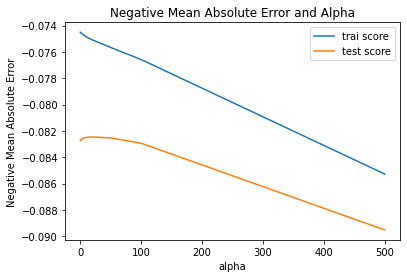

In [130]:
ridge_cval_output['param_alpha'] = ridge_cval_output['param_alpha'].astype('int32')

# plottting

plt.plot(ridge_cval_output['param_alpha'], ridge_cval_output['mean_train_score'])
plt.plot(ridge_cval_output['param_alpha'], ridge_cval_output['mean_test_score'])
plt.xlabel ('alpha')
plt.ylabel ('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['trai score', 'test score'], loc = 'upper right')
plt.show()

In [131]:
ridge_model_cval.best_estimator_

Ridge(alpha=20)

In [132]:
# Check the coefficient values with lambda value as 10
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.0255111 ,  0.02110411,  0.07707689,  0.04414767,  0.00994602,
        0.02073874, -0.00453114,  0.05732447,  0.09854854,  0.01176021,
        0.01644805,  0.01450828,  0.0329137 ,  0.01247854, -0.01624534,
       -0.0257322 ,  0.00901953,  0.01447763,  0.0128319 ,  0.01452485,
        0.019094  ,  0.01274571,  0.00858941,  0.01150226,  0.01303046,
        0.01579011,  0.03765698,  0.01937761,  0.05568514,  0.0195261 ,
        0.01617558,  0.02118362,  0.01970404,  0.017678  , -0.0116334 ,
        0.01248305, -0.01304174, -0.0217255 , -0.00424978,  0.01364803,
        0.01578108,  0.01547289,  0.03991257,  0.01723458,  0.01959534,
       -0.00131137,  0.00997504, -0.00409429,  0.01353178,  0.00096875])

## Evaluvate  the model

In [136]:
#Data Scaling

# importing scale library
from sklearn.preprocessing import scale

cols2 = X_test.columns

X_test = pd.DataFrame(scale(X_test))
X_test.columns = cols2
X_test.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'GarageCars', 'WoodDeckSF', 'oldornew',
       'PropertyAge', 'GarageAge', 'New_BsmtQual', 'New_HeatingQC',
       'New_KitchenQual', 'New_FireplaceQu', 'New_BsmtExposure',
       'New_BsmtFinType1', 'New_GarageFinish', 'New_HouseStyle',
       'New_SaleCondition', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior1st_Wd Sdng',
       'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_Wd Sdng',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_None

In [140]:
mean_squared_error(y_train, ridge.predict(X_train))

0.010545970555900428

In [137]:
mean_squared_error(y_test, ridge.predict(X_test))

0.016267656574285697

In [139]:
r2_score(y_train, ridge.predict(X_train))

0.9262925303397144

In [138]:
r2_score(y_test, ridge.predict(X_test))

0.8879413790691062

In [141]:
new_df_ridge = pd.DataFrame({'Features': X_train.columns, 'Coefficient': ridge.coef_.round(4)})
new_df_ridge.reset_index(drop=True, inplace=True)
new_df_ridge

,Features,Coefficient
0,MSSubClass,-0.0255
1,LotArea,0.0211
2,OverallQual,0.0771
3,OverallCond,0.0441
4,MasVnrArea,0.0099
5,BsmtFinSF1,0.0207
6,BsmtUnfSF,-0.0045
7,TotalBsmtSF,0.0573
8,GrLivArea,0.0985
9,BsmtFullBath,0.0118


In [142]:
ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0255,
 'LotArea': 0.0211,
 'OverallQual': 0.0771,
 'OverallCond': 0.0441,
 'MasVnrArea': 0.0099,
 'BsmtFinSF1': 0.0207,
 'BsmtUnfSF': -0.0045,
 'TotalBsmtSF': 0.0573,
 'GrLivArea': 0.0985,
 'BsmtFullBath': 0.0118,
 'FullBath': 0.0164,
 'HalfBath': 0.0145,
 'GarageCars': 0.0329,
 'WoodDeckSF': 0.0125,
 'oldornew': -0.0162,
 'PropertyAge': -0.0257,
 'GarageAge': 0.009,
 'New_BsmtQual': 0.0145,
 'New_HeatingQC': 0.0128,
 'New_KitchenQual': 0.0145,
 'New_FireplaceQu': 0.0191,
 'New_BsmtExposure': 0.0127,
 'New_BsmtFinType1': 0.0086,
 'New_GarageFinish': 0.0115,
 'New_HouseStyle': 0.013,
 'New_SaleCondition': 0.0158,
 'MSZoning_FV': 0.0377,
 'MSZoning_RH': 0.0194,
 'MSZoning_RL': 0.0557,
 'MSZoning_RM': 0.0195,
 'Neighborhood_BrkSide': 0.0162,
 'Neighborhood_Crawfor': 0.0212,
 'Neighborhood_NridgHt': 0.0197,
 'Neighborhood_StoneBr': 0.0177,
 'Exterior1st_BrkComm': -0.0116,
 'Exterior1st_BrkFace': 0.0125,
 'Exterior1st_CemntBd': -0.013,
 'Exterior1st_Wd Sdng': -0.0217,
 'Ex

In [143]:
X_train_rd = X_train[new_df_ridge.Features]
lm = LinearRegression()
lm.fit(X_train_rd, y_train)

# Executing RFE for 15 features

rfe = RFE(estimator=lm,n_features_to_select=15)
rfe = rfe.fit(X_train_rd, y_train)

In [144]:
def determine(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to new dataframe for further usage in bar plot

dt_ten = pd.DataFrame(list(zip(X_train_rd.columns,rfe.support_, rfe.ranking_)), columns =['Features', 'rfe_support', 'rfe_ranking'])
dt_ten = dt_ten.loc[dt_ten['rfe_support'] == True]
dt_ten.reset_index(drop = True, inplace=True)

dt_ten['Coefficient'] = dt_ten['Features'].apply(determine)
dt_ten = dt_ten.sort_values(by=['Coefficient'], ascending=False)
dt_ten = dt_ten.head(10)   # Considering only top 10 features
dt_ten

,Features,rfe_support,rfe_ranking,Coefficient
5,GrLivArea,True,1,0.0985
1,OverallQual,True,1,0.0771
4,TotalBsmtSF,True,1,0.0573
12,MSZoning_RL,True,1,0.0557
2,OverallCond,True,1,0.0441
14,Foundation_PConc,True,1,0.0399
10,MSZoning_FV,True,1,0.0377
6,GarageCars,True,1,0.0329
0,LotArea,True,1,0.0211
3,BsmtFinSF1,True,1,0.0207


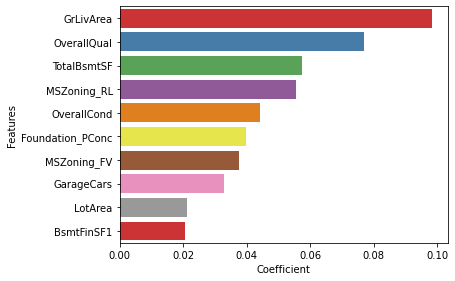

In [145]:
plt.figure(figsize = (20,20))
plt.subplot(4,3,1)
se.barplot(y = 'Features', x = 'Coefficient', palette = 'Set1', data = dt_ten)
plt.show()

### When we double the alpha

In [181]:
# Check the coefficient values with lambda value as 10
alpha = 40
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.02449544,  0.02142992,  0.07555181,  0.04328915,  0.01083999,
        0.02246267, -0.00187756,  0.05476935,  0.09476167,  0.01209736,
        0.01849125,  0.01559856,  0.0325128 ,  0.01245999, -0.01586656,
       -0.02578687,  0.00883412,  0.01454623,  0.01294147,  0.01591554,
        0.0197863 ,  0.01267345,  0.00908361,  0.01144637,  0.01260977,
        0.01608973,  0.03024923,  0.01541092,  0.04134709,  0.00614973,
        0.01563424,  0.02083989,  0.01922754,  0.0173378 , -0.01130748,
        0.01295782, -0.00854058, -0.01910747, -0.00403562,  0.00934985,
        0.01329825,  0.01184179,  0.03595869,  0.01570572,  0.01335559,
       -0.00295861,  0.00711986, -0.00560962,  0.00691382, -0.00267621])

In [184]:
r2_score(y_train, ridge.predict(X_train))

0.9253141401274847

In [185]:
r2_score(y_test, ridge.predict(X_test))

0.8870514443207166

In [186]:
new_df_ridge = pd.DataFrame({'Features': X_train.columns, 'Coefficient': ridge.coef_.round(4)})
new_df_ridge.reset_index(drop=True, inplace=True)
new_df_ridge

,Features,Coefficient
0,MSSubClass,-0.0245
1,LotArea,0.0214
2,OverallQual,0.0756
3,OverallCond,0.0433
4,MasVnrArea,0.0108
5,BsmtFinSF1,0.0225
6,BsmtUnfSF,-0.0019
7,TotalBsmtSF,0.0548
8,GrLivArea,0.0948
9,BsmtFullBath,0.0121


In [187]:
ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))

In [188]:
X_train_rd = X_train[new_df_ridge.Features]
lm = LinearRegression()
lm.fit(X_train_rd, y_train)

# Executing RFE for 15 features

rfe = RFE(estimator=lm,n_features_to_select=15)
rfe = rfe.fit(X_train_rd, y_train)

In [189]:
def determine(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to new dataframe for further usage in bar plot

dt_ten = pd.DataFrame(list(zip(X_train_rd.columns,rfe.support_, rfe.ranking_)), columns =['Features', 'rfe_support', 'rfe_ranking'])
dt_ten = dt_ten.loc[dt_ten['rfe_support'] == True]
dt_ten.reset_index(drop = True, inplace=True)

dt_ten['Coefficient'] = dt_ten['Features'].apply(determine)
dt_ten = dt_ten.sort_values(by=['Coefficient'], ascending=False)
dt_ten = dt_ten.head(10)   # Considering only top 10 features
dt_ten

,Features,rfe_support,rfe_ranking,Coefficient
5,GrLivArea,True,1,0.0948
1,OverallQual,True,1,0.0756
4,TotalBsmtSF,True,1,0.0548
2,OverallCond,True,1,0.0433
12,MSZoning_RL,True,1,0.0413
14,Foundation_PConc,True,1,0.0360
6,GarageCars,True,1,0.0325
10,MSZoning_FV,True,1,0.0302
3,BsmtFinSF1,True,1,0.0225
0,LotArea,True,1,0.0214


### Lasso

In [151]:
lasso = Lasso()

# Alpha values
# params = {'alpha': [0.0001,0.001,0.01,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,
#                    6.0,7.0,10.0,12.0,14.0, 16.0, 18.0, 20,50,100,500,1000]}
params = {'alpha': [0.0001,0.0002,0.0003,0.0004,0.0005,0.001,0.002,0.003,0.004,0.005,0.01]}

folds = 5

lasso_model_cvl = GridSearchCV(estimator = lasso,
                              param_grid = params,
                              scoring = 'neg_mean_absolute_error',
                              cv = folds,
                              return_train_score = True,
                              verbose = 1)
lasso_model_cvl.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [152]:
lasso_cvl_output = pd.DataFrame(lasso_model_cvl.cv_results_)
lasso_cvl_output[['param_alpha','mean_train_score','mean_test_score','rank_test_score']].sort_values(by =['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
4,0.0005,-0.074925,-0.082666,1
3,0.0004,-0.074853,-0.082668,2
1,0.0002,-0.074664,-0.082679,3
2,0.0003,-0.074780,-0.082689,4
0,0.0001,-0.074580,-0.082780,5
5,0.001,-0.075328,-0.082802,6
6,0.002,-0.075952,-0.083113,7
7,0.003,-0.076417,-0.083513,8
8,0.004,-0.076912,-0.083980,9
9,0.005,-0.077553,-0.084443,10


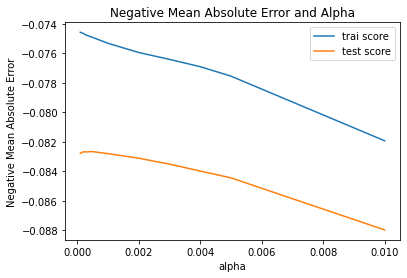

In [153]:
lasso_cvl_output['param_alpha'] = lasso_cvl_output['param_alpha'].astype('float64')

# plottting

plt.plot(lasso_cvl_output['param_alpha'], lasso_cvl_output['mean_train_score'])
plt.plot(lasso_cvl_output['param_alpha'], lasso_cvl_output['mean_test_score'])
plt.xlabel ('alpha')
plt.ylabel ('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['trai score', 'test score'], loc = 'upper right')
plt.show()

In [154]:
lasso_model_cvl.best_estimator_

Lasso(alpha=0.0005)

In [155]:
alpha = 0.0005

lasso = Lasso(alpha = alpha)
lasso.fit(X_train, y_train)
lasso.coef_

array([-0.02497105,  0.01994747,  0.07978914,  0.04454809,  0.00881656,
        0.01961462, -0.00601281,  0.05828815,  0.1037238 ,  0.01103429,
        0.01273677,  0.01234585,  0.033659  ,  0.01202541, -0.01605505,
       -0.0254214 ,  0.00872027,  0.01359259,  0.01219887,  0.01339118,
        0.01792962,  0.01299647,  0.008156  ,  0.01197985,  0.01188448,
        0.01548337,  0.04516856,  0.02243577,  0.07135654,  0.03243121,
        0.01571972,  0.02029811,  0.0195019 ,  0.01688923, -0.01151098,
        0.01215486, -0.00234841, -0.02052797, -0.00406378,  0.00309284,
        0.01393187,  0.01588961,  0.04113078,  0.01676281,  0.01530059,
       -0.00173399,  0.0078947 , -0.00400117,  0.0095132 , -0.        ])

### Evaluvate the lasso

In [156]:
mean_squared_error(y_test,lasso.predict(X_test))

0.01613143744959956

In [158]:
r2_score(y_train, lasso.predict(X_train))

0.9265069102257251

In [157]:
r2_score(y_test, lasso.predict(X_test))

0.8888797150357549

In [159]:
lasso_new = pd.DataFrame({'Features': X_train.columns, 'Coefficient': lasso.coef_.round(4)})
lasso_new = lasso_new[lasso_new['Coefficient']!=0.00] # Feature eliminaions where coefficient is Zero
lasso_new.reset_index(drop =True, inplace=True)
lasso_new

,Features,Coefficient
0,MSSubClass,-0.0250
1,LotArea,0.0199
2,OverallQual,0.0798
3,OverallCond,0.0445
4,MasVnrArea,0.0088
5,BsmtFinSF1,0.0196
6,BsmtUnfSF,-0.0060
7,TotalBsmtSF,0.0583
8,GrLivArea,0.1037
9,BsmtFullBath,0.0110


In [160]:
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.02497105076555463,
 'LotArea': 0.019947470367352983,
 'OverallQual': 0.07978913689228845,
 'OverallCond': 0.044548093141933975,
 'MasVnrArea': 0.008816561936764505,
 'BsmtFinSF1': 0.01961461828179399,
 'BsmtUnfSF': -0.006012814320426478,
 'TotalBsmtSF': 0.058288147140932715,
 'GrLivArea': 0.10372379614925827,
 'BsmtFullBath': 0.011034290636521463,
 'FullBath': 0.012736771559432512,
 'HalfBath': 0.012345850944136715,
 'GarageCars': 0.03365900281838434,
 'WoodDeckSF': 0.012025412216648155,
 'oldornew': -0.016055054816438544,
 'PropertyAge': -0.025421396910689197,
 'GarageAge': 0.008720274767424537,
 'New_BsmtQual': 0.013592591051801948,
 'New_HeatingQC': 0.012198873250473854,
 'New_KitchenQual': 0.01339117542124886,
 'New_FireplaceQu': 0.01792962197877514,
 'New_BsmtExposure': 0.012996468860369138,
 'New_BsmtFinType1': 0.008155998823703495,
 'New_GarageFinish': 0.011979849933376205,
 'New_HouseStyle': 0.011884476564941153,
 'New_SaleCondition': 0.015483370588101184,
 'M

In [161]:
X_train_lasso = X_train[lasso_new.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# Executing RFE 

rfe = RFE(estimator=lm,n_features_to_select=15,step=1)
rfe = rfe.fit(X_train_lasso, y_train)

In [162]:
def determine(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to new dataframe for further usage in bar plot

dtl_ten = pd.DataFrame(list(zip(X_train_lasso.columns,rfe.support_, rfe.ranking_)), columns =['Features', 'rfe_support', 'rfe_ranking'])
dtl_ten = dtl_ten.loc[dtl_ten['rfe_support'] == True]
dtl_ten.reset_index(drop = True, inplace=True)

dtl_ten['Coefficient'] = dtl_ten['Features'].apply(determine)
dtl_ten = dtl_ten.sort_values(by=['Coefficient'], ascending=False)
dtl_ten = dtl_ten.head(10)
dtl_ten

,Features,rfe_support,rfe_ranking,Coefficient
5,GrLivArea,True,1,0.103724
1,OverallQual,True,1,0.079789
12,MSZoning_RL,True,1,0.071357
4,TotalBsmtSF,True,1,0.058288
10,MSZoning_FV,True,1,0.045169
2,OverallCond,True,1,0.044548
14,Foundation_PConc,True,1,0.041131
6,GarageCars,True,1,0.033659
13,MSZoning_RM,True,1,0.032431
11,MSZoning_RH,True,1,0.022436


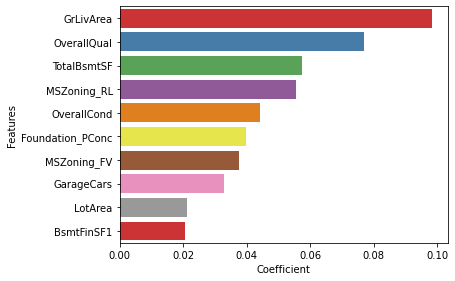

In [163]:
plt.figure(figsize = (20,20))
plt.subplot(4,3,1)
se.barplot(y = 'Features', x = 'Coefficient', palette = 'Set1', data = dt_ten)
plt.show()

### When we double the alpha

In [178]:
alpha = 0.0010

lasso = Lasso(alpha = alpha)
lasso.fit(X_train, y_train)
lasso.coef_

array([-0.02321935,  0.01922436,  0.08177398,  0.04456591,  0.00892704,
        0.02155076, -0.00345323,  0.05611397,  0.10351475,  0.01134719,
        0.01236095,  0.01218123,  0.03351939,  0.01198697, -0.01630327,
       -0.02584774,  0.00819138,  0.01212597,  0.0114809 ,  0.01386112,
        0.01785593,  0.01252386,  0.00839428,  0.0119105 ,  0.01056534,
        0.01632955,  0.03154615,  0.01426126,  0.04374711,  0.0058771 ,
        0.01483143,  0.01919716,  0.01857615,  0.01574585, -0.01085223,
        0.01252919, -0.        , -0.01618532, -0.0034504 ,  0.0006269 ,
        0.00947148,  0.01142859,  0.03709107,  0.01453144,  0.00564723,
       -0.0038743 ,  0.00338282, -0.00582551,  0.        , -0.00415916])

In [179]:
r2_score(y_train, lasso.predict(X_train))

0.9252222282084346

In [180]:
r2_score(y_test, lasso.predict(X_test))

0.8877289352503278

In [190]:
lasso_new = pd.DataFrame({'Features': X_train.columns, 'Coefficient': lasso.coef_.round(4)})
lasso_new = lasso_new[lasso_new['Coefficient']!=0.00] # Feature eliminaions where coefficient is Zero
lasso_new.reset_index(drop =True, inplace=True)


In [191]:
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))

In [192]:
X_train_lasso = X_train[lasso_new.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# Executing RFE 

rfe = RFE(estimator=lm,n_features_to_select=15,step=1)
rfe = rfe.fit(X_train_lasso, y_train)

In [193]:
def determine(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to new dataframe for further usage in bar plot

dtl_ten = pd.DataFrame(list(zip(X_train_lasso.columns,rfe.support_, rfe.ranking_)), columns =['Features', 'rfe_support', 'rfe_ranking'])
dtl_ten = dtl_ten.loc[dtl_ten['rfe_support'] == True]
dtl_ten.reset_index(drop = True, inplace=True)

dtl_ten['Coefficient'] = dtl_ten['Features'].apply(determine)
dtl_ten = dtl_ten.sort_values(by=['Coefficient'], ascending=False)
dtl_ten = dtl_ten.head(10)
dtl_ten

,Features,rfe_support,rfe_ranking,Coefficient
5,GrLivArea,True,1,0.103515
1,OverallQual,True,1,0.081774
4,TotalBsmtSF,True,1,0.056114
2,OverallCond,True,1,0.044566
12,MSZoning_RL,True,1,0.043747
14,Foundation_PConc,True,1,0.037091
6,GarageCars,True,1,0.033519
10,MSZoning_FV,True,1,0.031546
3,BsmtFinSF1,True,1,0.021551
0,LotArea,True,1,0.019224


### removed top 5 features

In [164]:
X_train_red = X_train.drop(['GrLivArea','OverallQual', 'MSZoning_RL', 'TotalBsmtSF', 'OverallCond'], axis=1)
X_test_red = X_test.drop(['GrLivArea','OverallQual', 'MSZoning_RL', 'TotalBsmtSF', 'OverallCond'], axis=1)

lasso = Lasso()

# Alpha values

params = {'alpha': [0.0001,0.0002,0.0003,0.0004,0.0005,0.001,0.002,0.003,0.004,0.005,0.01]}

folds = 5

lasso_model_cvl = GridSearchCV(estimator = lasso,
                              param_grid = params,
                              scoring = 'neg_mean_absolute_error',
                              cv = folds,
                              return_train_score = True,
                              verbose = 1)
lasso_model_cvl.fit(X_train_red, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [165]:
lasso_cvl_output = pd.DataFrame(lasso_model_cvl.cv_results_)
lasso_cvl_output[['param_alpha','mean_train_score','mean_test_score','rank_test_score']].sort_values(by =['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
6,0.002,-0.104790,-0.112878,1
7,0.003,-0.105249,-0.112965,2
5,0.001,-0.104354,-0.112975,3
8,0.004,-0.105731,-0.113040,4
4,0.0005,-0.104043,-0.113062,5
3,0.0004,-0.103953,-0.113177,6
2,0.0003,-0.103876,-0.113303,7
9,0.005,-0.106268,-0.113355,8
1,0.0002,-0.103800,-0.113424,9
0,0.0001,-0.103732,-0.113529,10


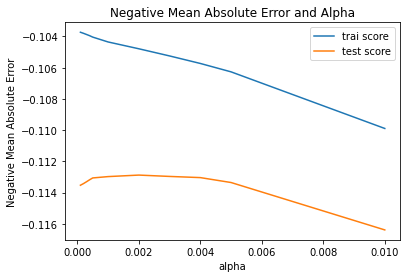

In [166]:
lasso_cvl_output['param_alpha'] = lasso_cvl_output['param_alpha'].astype('float64')

# plottting

plt.plot(lasso_cvl_output['param_alpha'], lasso_cvl_output['mean_train_score'])
plt.plot(lasso_cvl_output['param_alpha'], lasso_cvl_output['mean_test_score'])
plt.xlabel ('alpha')
plt.ylabel ('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['trai score', 'test score'], loc = 'upper right')
plt.show()

In [167]:
lasso_model_cvl.best_estimator_

Lasso(alpha=0.002)

In [168]:
alpha = 0.002

lasso = Lasso(alpha = alpha)
lasso.fit(X_train_red, y_train)
lasso.coef_

array([-0.02910039,  0.03832474,  0.02424287,  0.0854778 ,  0.06329691,
        0.0122793 ,  0.07265611,  0.04543882,  0.05271677,  0.01372218,
       -0.00396658, -0.04275118, -0.00477642,  0.01893813,  0.02099851,
        0.0470182 ,  0.04503541,  0.01036227,  0.00748957,  0.00802434,
        0.02986365,  0.01765153,  0.00807893,  0.01043454, -0.01866138,
        0.01788066,  0.03491288,  0.02267728,  0.02696335, -0.01046647,
        0.01953975,  0.        , -0.01080427, -0.        ,  0.00019797,
        0.01319821,  0.        ,  0.01667931,  0.        ,  0.00988636,
       -0.00120618,  0.00058925, -0.00855292,  0.        , -0.00303145])

In [170]:
mean_squared_error(y_test,lasso.predict(X_test_red))

0.026020242839800065

In [176]:
r2_score(y_train, lasso.predict(X_train_red))

0.8596162032771599

In [177]:
r2_score(y_test, lasso.predict(X_test_red))

0.8207613668508373

In [171]:
lasso_new = pd.DataFrame({'Features': X_train_red.columns, 'Coefficient': lasso.coef_.round(4)})
lasso_new = lasso_new[lasso_new['Coefficient']!=0.00] # Feature eliminaions where coefficient is Zero
lasso_new.reset_index(drop =True, inplace=True)
lasso_new

,Features,Coefficient
0,MSSubClass,-0.0291
1,LotArea,0.0383
2,MasVnrArea,0.0242
3,BsmtFinSF1,0.0855
4,BsmtUnfSF,0.0633
5,BsmtFullBath,0.0123
6,FullBath,0.0727
7,HalfBath,0.0454
8,GarageCars,0.0527
9,WoodDeckSF,0.0137


In [172]:
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train_red.columns))
lasso_coeff_dict

{'MSSubClass': -0.029100391041845843,
 'LotArea': 0.038324738202137866,
 'MasVnrArea': 0.024242871739480355,
 'BsmtFinSF1': 0.0854777971791562,
 'BsmtUnfSF': 0.06329690640568786,
 'BsmtFullBath': 0.012279299886915165,
 'FullBath': 0.07265611485392612,
 'HalfBath': 0.04543882021282492,
 'GarageCars': 0.05271676756708379,
 'WoodDeckSF': 0.01372217579911284,
 'oldornew': -0.003966577683972264,
 'PropertyAge': -0.04275118182390887,
 'GarageAge': -0.004776420089182826,
 'New_BsmtQual': 0.018938126549314996,
 'New_HeatingQC': 0.020998507661477678,
 'New_KitchenQual': 0.04701819926396067,
 'New_FireplaceQu': 0.04503541224574384,
 'New_BsmtExposure': 0.010362273325263328,
 'New_BsmtFinType1': 0.007489567593455223,
 'New_GarageFinish': 0.008024344175000881,
 'New_HouseStyle': 0.029863649145350526,
 'New_SaleCondition': 0.017651532242218396,
 'MSZoning_FV': 0.008078927821865133,
 'MSZoning_RH': 0.01043453816478975,
 'MSZoning_RM': -0.0186613818668662,
 'Neighborhood_BrkSide': 0.01788066446474996

In [173]:
X_train_lasso = X_train_red[lasso_new.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# Executing RFE 

rfe = RFE(estimator=lm,n_features_to_select=15,step=1)
rfe = rfe.fit(X_train_lasso, y_train)

In [174]:
def determine(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to new dataframe for further usage in bar plot

dtl_ten = pd.DataFrame(list(zip(X_train_lasso.columns,rfe.support_, rfe.ranking_)), columns =['Features', 'rfe_support', 'rfe_ranking'])
dtl_ten = dtl_ten.loc[dtl_ten['rfe_support'] == True]
dtl_ten.reset_index(drop = True, inplace=True)

dtl_ten['Coefficient'] = dtl_ten['Features'].apply(determine)
dtl_ten = dtl_ten.sort_values(by=['Coefficient'], ascending=False)
dtl_ten = dtl_ten.head(10)   # Considering only top 10 features
dtl_ten

,Features,rfe_support,rfe_ranking,Coefficient
1,BsmtFinSF1,True,1,0.085478
3,FullBath,True,1,0.072656
2,BsmtUnfSF,True,1,0.063297
5,GarageCars,True,1,0.052717
9,New_KitchenQual,True,1,0.047018
4,HalfBath,True,1,0.045439
10,New_FireplaceQu,True,1,0.045035
0,LotArea,True,1,0.038325
12,Neighborhood_Crawfor,True,1,0.034913
11,New_HouseStyle,True,1,0.029864


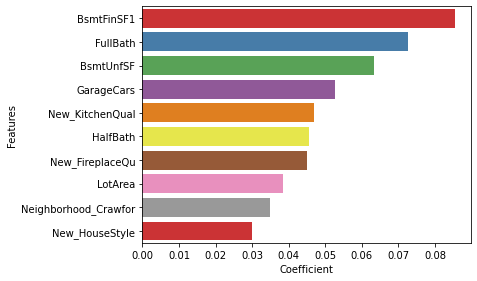

In [175]:
plt.figure(figsize = (20,20))
plt.subplot(4,3,1)
se.barplot(y = 'Features', x = 'Coefficient', palette = 'Set1', data = dtl_ten)
plt.show()

## Conclusion
### Lasso is better than ridge model

### R2 score for lasso :
####Train score: 0.9265
####Test Score: 0.8888

### R2 score for ridge
####Train score: 0.9262
####Test Score: 0.8879

### Top 5 Features
##### 'GrLivArea','OverallQual', 'MSZoning_RL', 'TotalBsmtSF', 'OverallCond'
